<img src="img/DN.png" style="float:right;width:150px">

Das Modul Matplotlib

# Übungen in dieser Lektion

* [Plot von Zufallszahlen](#Aufgabe1)
* [Liniendiagramm misteriöser Zahlen](#Aufgabe2)
* [Schlussaufgabe](#Aufgabe3)

# Matplotlib

[Matplotlib](https://matplotlib.org/) ist ein Modul, welches zur Visualisierung von Daten dient. Matplotlib harmoniert insbesondere mit den Modulen NumPy und Pandas aus der letzten Lektion sehr gut. Matplotlib kann sowohl NumPy Arrays als auch Pandas DataFrames visualisieren.

## Grundlegender Aufbau

Matplotlib kann man auf sehr unterschiedliche Arten und Weisen benutzen, das macht das Nachvollziehen von Beispielen aus dem Internet zuweilen etwas mühsam. Die einfachste Art und Weise funktioniert folgendermassen:

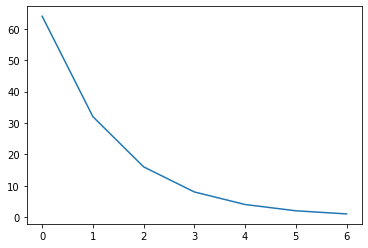

In [1]:
%matplotlib inline

import matplotlib.pyplot as plt

plt.plot([64, 32, 16, 8, 4, 2, 1])

plt.show()

Wir haben hier also zuerst das Magic Command `%matplotlib inline`, damit die Visualisierungen innerhalb der Zelle wiedergegeben werden. Danach importieren wir das Modul `matplotlib.pyplot` unter dem Namen `plt`. Dies ist eine weitverbreitete Konvention. Die Angabe, was denn überhaupt geplottet werden soll machen wir mit dem Befehl `plt.plot()`. Dieser Funktion kann eine Liste mit Zahlen übergeben werden. Falls nur eine Liste übergeben wird, interpretiert Matplotlib die Zahlen so, dass sie als y-Werte entlang der x-Achse beginnend mit x = 0 gezeichnet werden. Mit `plt.show()` kann man dann schlussendlich den Plot auch anzeigen.

Werden zwei Listen der Funktion `plt.plot()` übergeben, interpretiert Matplotlib diese als x- und y-Werte:

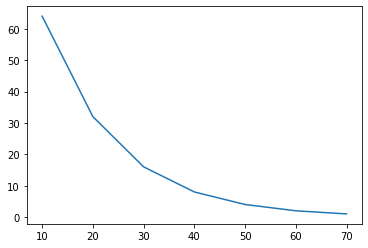

In [2]:
plt.plot([10, 20, 30, 40, 50, 60, 70], [64, 32, 16, 8, 4, 2, 1])
plt.show()

<div id="Aufgabe1" style="margin:0px; padding:10px; border-style:solid; border-width:2px; border-color:green;">

<img src="img/dumbbell.png" style="float:right; width:100px">

<span style="padding:5px; border-radius:5px; background-color:green; color:white">Aufgabe</span>

Erstelle einen Plot, der als y-Werte 100 Zufallszahlen zwischen 0 und 100 darstellt.
    
Hinweis: Es gibt verschiedene Möglichkeiten, eine Liste von Zufallszahlen zu erstellen. Nimm am besten die Funktion `random.randint()` aus dem Modul Numpy, welches es ermöglicht, nicht nur einzelne Zufallszahlen, sondern ganze Listen davon zu erstellen. Eine Beschreibung zu `random.randint()` findest du [hier](https://numpy.org/doc/stable/reference/random/generated/numpy.random.randint.html).
</div>

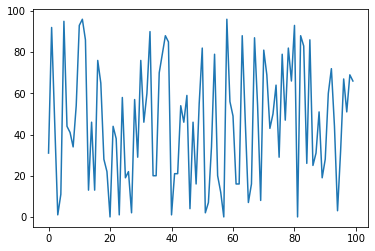

In [3]:
# Beginn eigener Code

%matplotlib inline

import matplotlib.pyplot as plt
import numpy as np

plt.plot(np.random.randint(low = 0, high = 100, size = 100))

plt.show()

# Ende eigener Code

***

## Import von interessanteren Daten

Um möglichst schnell interessantere Daten zu visualisieren, bereiten wir uns Daten zum Verlauf der Covid19 Pandemie von offizieller Seite auf. Dafür laden wir CSV Daten aus dem offiziellen Portal des Bundesamts für Gesundheit runter und speichern sie in einem Pandas DataFrame. Diese Daten resp. die dazugehörigen Metadaten sind übrigens auch im [Open Data Portal der Schweiz](https://opendata.swiss/de/dataset/covid-19-schweiz) zu finden.

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

raw_data = pd.read_csv('https://www.covid19.admin.ch/api/data/20211130-j81jli94/sources/COVID19Cases_geoRegion.csv', sep = ',')

# falls Abruf wegen SSL Fehler nicht klappt, Daten einfach lokal nutzen:
# raw_data = pd.read_csv('data/covid.csv', sep = ',')

Um einen Überblick über die Daten zu gewinnen, zeigen wir eine Übersicht über die ersten Zeilen und Spalten an.

In [5]:
display(raw_data.head(5))

,geoRegion,datum,entries,sumTotal,timeframe_7d,offset_last7d,sumTotal_last7d,timeframe_14d,offset_last14d,sumTotal_last14d,...,inzsum14d,sumdelta7d,inzdelta7d,type,type_variant,version,datum_unit,entries_letzter_stand,entries_neu_gemeldet,entries_diff_last
0,CH,2020-02-24,1,1,False,963021,0,False,922254,0,...,NaN,NaN,NaN,COVID19Cases,NaN,2021-11-30_07-48-34,day,1,0,8355
1,CH,2020-02-25,1,2,False,963021,0,False,922254,0,...,NaN,NaN,NaN,COVID19Cases,NaN,2021-11-30_07-48-34,day,1,0,8355
2,CH,2020-02-26,10,12,False,963021,0,False,922254,0,...,NaN,NaN,NaN,COVID19Cases,NaN,2021-11-30_07-48-34,day,10,0,8355
3,CH,2020-02-27,10,22,False,963021,0,False,922254,0,...,NaN,NaN,NaN,COVID19Cases,NaN,2021-11-30_07-48-34,day,10,0,8355
4,CH,2020-02-28,10,32,False,963021,0,False,922254,0,...,NaN,NaN,NaN,COVID19Cases,NaN,2021-11-30_07-48-34,day,10,0,8355


Die für uns interessanten Daten sind in den ersten Spalten: 'geoRegion' bezeichnet den Kanton resp. die ganze Schweiz, 'datum' bezeichnet den einzelnen Tag und 'entries' ist die gemeldete Anzahl von Covid Infektionen. Um mit diesen Daten besser zu arbeiten, möchten wir zwei DataFrames erstellen, eines mit Angaben zum Kanton Bern, das andere zum Kanton Zürich. Und wir wollen nur die Spalten 'datum' und 'entries' weiterverwenden:

In [6]:
# Filtern
zh_data = raw_data[raw_data.geoRegion == "ZH"]

# nur bestimmte Spalten übernehmen 
zh_data = zh_data[["datum", "entries"]]

be_data = raw_data[raw_data.geoRegion == "BE"]
be_data = be_data[["datum", "entries"]]

display(zh_data.head(5))
display(be_data.head(5))

,datum,entries
18088,2020-02-24,0
18089,2020-02-25,0
18090,2020-02-26,1
18091,2020-02-27,1
18092,2020-02-28,0


,datum,entries
3230,2020-02-24,0
3231,2020-02-25,0
3232,2020-02-26,0
3233,2020-02-27,1
3234,2020-02-28,0


## Line Chart

Die wohl fundamentalste Visualisierung ist das Liniendiagramm (Line Chart). Ein Liniendiagramm macht dann Sinn, wenn bestimmte Beobachtungen sich entlang einer kontinuierlichen Grösse verändern. Ein ganz typisches Beispiel ist die Zeitreihenanalyse (Time Series), wo eine bestimmte Grösse entlang einer Zeitachse betrachtet wird.

Eine solche Zeitreihenalayse können wir mit den Corona Daten durchführen:

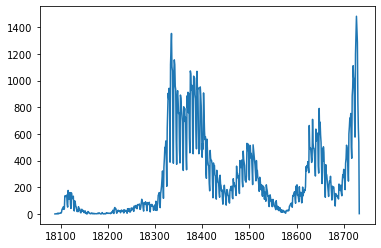

In [7]:
plt.plot(zh_data["entries"])
plt.show()

'zh_data["entries"]' gibt die Spalte für die Ansteckungen aus dem DataFrame. 

Dies ist zwar keine Liste, wie man sich selbst überzeugen kann:

In [8]:
type(zh_data["entries"])

pandas.core.series.Series

Aber wie schon erwähnt, Matplotlib arbeitet gut mit Objekten aus NumPy und Pandas zusammen, deshalb kann hier der Datentyp der `Series` sofort geplottet werden.

Wenig hilfreich ist noch die Angabe auf der x-Achse, welches die Zeilenzahl des ursprünglichen DataFrames darstellt. Aber hier möchten wir das natürlich das Datum haben:

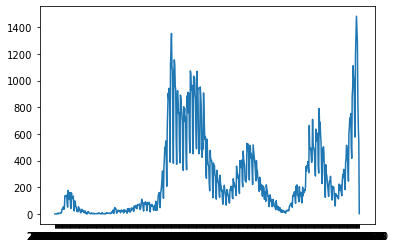

In [9]:
plt.plot(zh_data["datum"], zh_data["entries"])
plt.show()

Das dauert ziemlich lange und schlussendlich ist die Ausgabe nicht besonders hilfreich. Der Grund dafür ist, dass die Werte von 'Datum' für uns Menschen natürlich sofort als Datum erkennbar sind, der Computer weiss zuerst aber mal nicht, dass er dies als Datumswerte interpretieren soll. Das müssen wir ihm zuerst mitteilen:

In [10]:
zh_data["datum"] = pd.to_datetime(zh_data["datum"])
zh_data.info()
zh_data.head(5)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 646 entries, 18088 to 18733
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype         
---  ------   --------------  -----         
 0   datum    646 non-null    datetime64[ns]
 1   entries  646 non-null    int64         
dtypes: datetime64[ns](1), int64(1)
memory usage: 15.1 KB


,datum,entries
18088,2020-02-24,0
18089,2020-02-25,0
18090,2020-02-26,1
18091,2020-02-27,1
18092,2020-02-28,0


Mit der Funktion `to_datetime()` können wir die bisherigen Strings in "echte" Zeitdaten verwandeln. Die Funktion `info()` liefert uns die Datentypen für jede Spalte eines DataFrames, wo wir jetzt sehen können, dass die Spalte 'datum' nun ein `datetime64` objekt ist. Bei der Darstellung über `head()` kann man den Unterschied allerdings nicht sehen. Wenn wir jetzt nochmals den Plot zeichnen lassen, passt die Beschriftung der x-Achse:

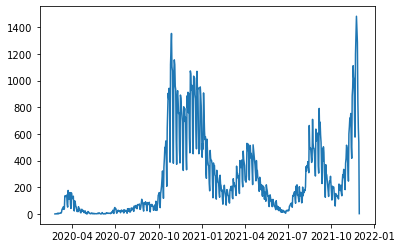

In [11]:
plt.plot(zh_data["datum"], zh_data["entries"])
plt.show()

Jetzt möchten wir einen Plot erstellen, wo man gleichzeitig die Zahlen aus Zürich und Bern anschauen kann:

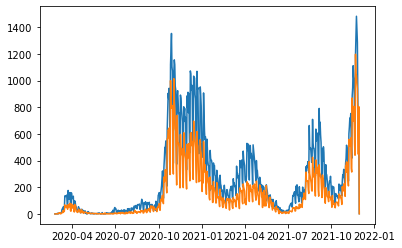

In [12]:
be_data["datum"] = pd.to_datetime(be_data["datum"])
plt.plot(zh_data["datum"], zh_data["entries"], be_data["datum"], be_data["entries"])
plt.show()

Man kann also bei der Funktion `plot()` einfach weitere x/y Datenpaare angeben, die dann übereinandergelegt gezeichnet werden.

Jetzt möchten wir den Plot noch etwas verfeinern mit Zusatzangaben:

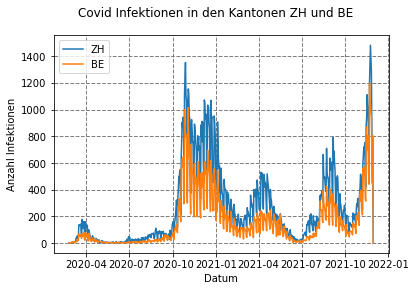

In [13]:
plt.plot(zh_data["datum"], zh_data["entries"], be_data["datum"], be_data["entries"])
plt.suptitle("Covid Infektionen in den Kantonen ZH und BE")
plt.xlabel("Datum")
plt.ylabel("Anzahl Infektionen")
plt.legend(["ZH", "BE"])
plt.grid(color = "grey", linestyle = "--", linewidth=1)
plt.show()

Die Grösse der ausgegebenen Grafik lässt sich über `plt.rcParams['figure.figsize'] = [x, y]` anpassen:

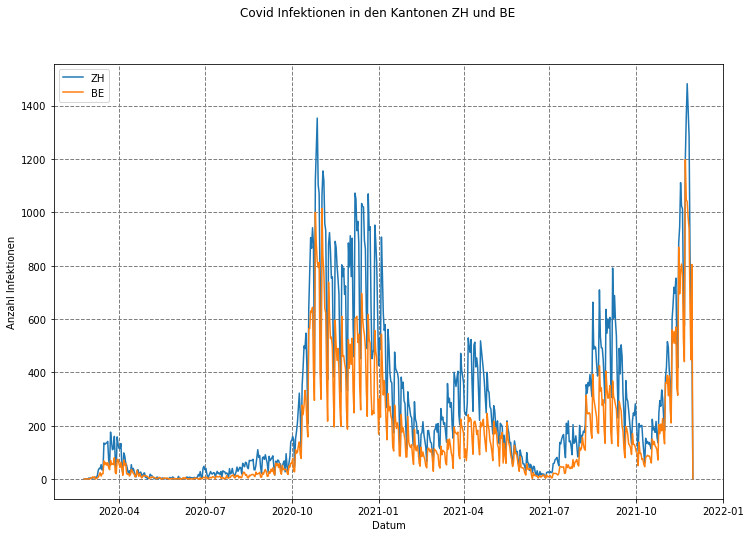

In [14]:
plt.rcParams['figure.figsize'] = [12, 8]
plt.plot(zh_data["datum"], zh_data["entries"], be_data["datum"], be_data["entries"])
plt.suptitle("Covid Infektionen in den Kantonen ZH und BE")
plt.xlabel("Datum")
plt.ylabel("Anzahl Infektionen")
plt.legend(["ZH", "BE"])
plt.grid(color = "grey", linestyle = "--", linewidth=1)
plt.show()

Die Grafiken können einfach auf dem Computer gespeichert werden, wenn man mit 'Shift + Rechtsklick' auf die Grafik klickt und dann 'Grafik speichern unter...' wählt.

<div id="Aufgabe2" style="margin:0px; padding:10px; border-style:solid; border-width:2px; border-color:green;">

<img src="img/dumbbell.png" style="float:right; width:100px">

<span style="padding:5px; border-radius:5px; background-color:green; color:white">Aufgabe</span>

Schau dir die Daten unter [data/linedata.csv](data/linedata.csv) an. Versuche Regelmässigkeiten in den Daten zu erkennen. Zeichne die Daten dann als schön gestaltetes Liniendigramm mit den 'Monat' Werten als x-Achse und den 'Anzahl' Werten als y-Achse. Hast du eine Idee, was die Zahlen abbilden könnten? Schau dir dazu insbesondere die Werte nach September 2001 und die Werte im Frühjahr 2020 an.
    
Hinweis: Denke daran, die Spalte 'Monat' in echte Datumswerte zu verwandeln.
</div>

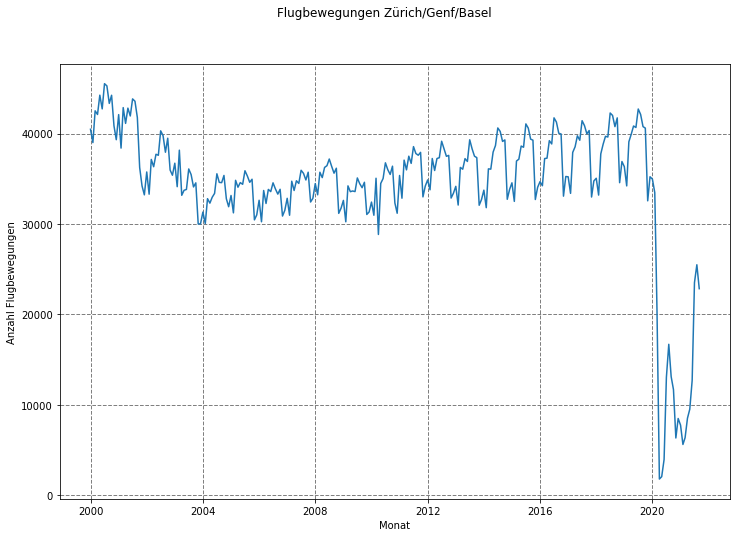

In [15]:
# Beginn eigener Code

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

flights = pd.read_csv("data/linedata.csv", sep = ";")

flights["Monat"] = pd.to_datetime(flights["Monat"])

plt.rcParams['figure.figsize'] = [12, 8]

plt.plot(flights["Monat"], flights["Anzahl"])

plt.suptitle("Flugbewegungen Zürich/Genf/Basel")
plt.xlabel("Monat")
plt.ylabel("Anzahl Flugbewegungen")
plt.grid(color = "grey", linestyle = "--", linewidth=1)
plt.show()

# Ende eigener Code

Die Zahlen stellen die Anzahl Flugbewegungen (Starts und Landungen) ab den Flughäfen Zürich/Genf/Basel (Summe) dar. Mehr Infos zu diesen Zahlen gibt es [hier](https://www.pxweb.bfs.admin.ch/pxweb/de/px-x-1107020000_101/-/px-x-1107020000_101.px/).

***

## Scatterplot

Das **Streudiagramm** ist ein weiterer wichtiger Visualisierungstyp. Es kommt dann zum Einsatz, wenn man einen allfälligen Zusammenhang (Korrelation) zwischen zwei Variablen einer Beobachtung untersuchen möchte. Beim Streudiagramm werden Wertepaare in einem x-y Koordinatensystem abgebildet. Die Werte der Variablen stehen dabei nicht in einem kontinuerlichen Zusammenhang (im Gegensatz bspw. zu einer Zeitreihe, wo die verschiedenen x-Werte (Zeiten) in einer Abfolge stehen und es deshalb Sinn macht, eine verbindende Linie zu zeichnen).

Nachfolgend wollen wir uns Daten zum Geysir "[Old Faithful](https://de.wikipedia.org/wiki/Old_Faithful)" im Yellowstone National Park anschauen. Wir haben eine CSV Datei unter [data/old_faithful.csv](data/old_faithful.csv), die zwei Spalten enhält. In der einen Spalte ('duration') wird die Dauer eines Ausbruchs in Minuten angegeben, in der zweiten Spalte ('waiting') die anschliessend erfolgte Wartezeit in Minuten bis zum nächsten Ausbruch.

Die Frage ist nun, ob diese zwei Grössen in irgendeinem Zusammenhang stehen. Versuche diese Frage zu beantworten, indem Du Dir einfach die Zahlen ausgeben lässt:

In [16]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

old_faithful = pd.read_csv("data/old_faithful.csv", sep = ";")

display(old_faithful.head(50))

,duration,waiting
0,3.600,79
1,1.800,54
2,3.333,74
3,2.283,62
4,4.533,85
5,2.883,55
6,4.700,88
7,3.600,85
8,1.950,51
9,4.350,85


Es ist ziemlich schwierig, eine so grosse Anzahl Zahlen auf einen Blick zu erfassen und Muster zu erkennen. Viel einfacher geht es mit einer Visualisierung:

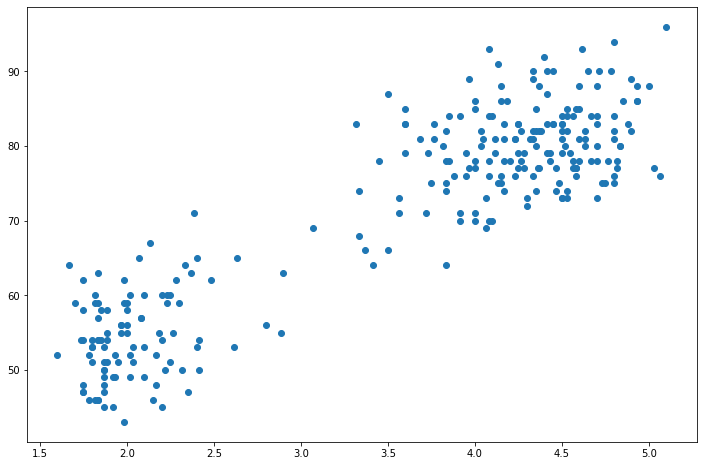

In [17]:
plt.scatter(old_faithful["duration"], old_faithful["waiting"])
plt.show()

Mit diesem Streuplot wird sofort klar, dass es zwei "Cluster" gibt, die sich dadurch auszeichnen, dass bei einem kurzen Ausbruch tendentiell eine kurze Wartezeit folgt, während nach einem langen Ausbruch auch eine lange Wartezeit folgt.

Möchte man bei einem Streudiagramm mehrere Datensätze gleichzeitig in einem Diagramm abgebildet haben, kann man die `plt.scatter()` Funktion einfach mehrmals aufrufen mit unterschiedlichen Daten. Innerhalb der gleichen Zelle werden dann alle Daten in einem Diagramm dargestellt.

# Schlussaufgabe

<div id="Aufgabe3" style="margin:0px; padding:10px; border-style:solid; border-width:2px; border-color:green;">

<img src="img/dumbbell.png" style="float:right; width:100px">

<span style="padding:5px; border-radius:5px; background-color:green; color:white">Aufgabe</span>

Erstelle ein verfeinertes Streudiagramm basierend auf den [Old Faithful Daten](data/old_faitful.csv). Und zwar sollen die beiden Cluster farblich unterschieden werden. Nimm eine sinnvolle Ausbruchszeit, um die Daten in kurze resp. lange Ausbrüche zu gliedern. Beschrifte ausserdem dein Diagramm und zeichne ein Gitter hinter die Daten.
</div>

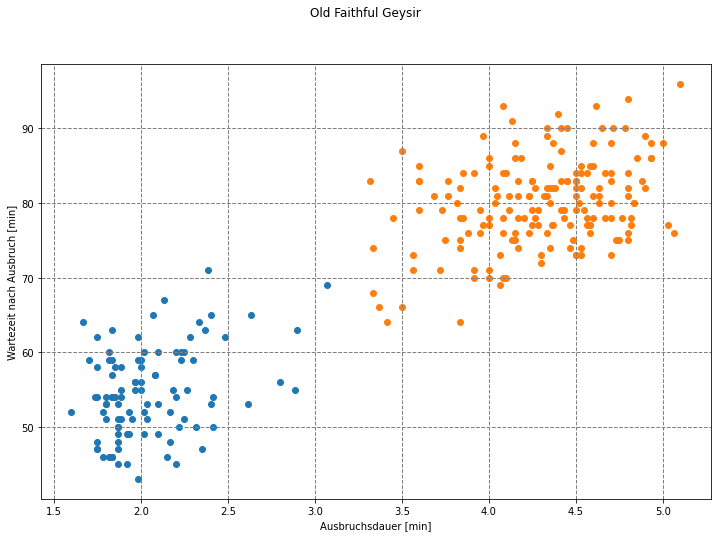

In [18]:
# Beginn eigener Code

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

old_faithful = pd.read_csv("data/old_faithful.csv", sep = ";")

old_faithful_short = old_faithful[old_faithful.duration <= 3.25]
old_faithful_long = old_faithful[old_faithful.duration > 3.25]

plt.rcParams['figure.figsize'] = [12, 8]

plt.scatter(old_faithful_short["duration"], old_faithful_short["waiting"])
plt.scatter(old_faithful_long["duration"], old_faithful_long["waiting"])
plt.suptitle("Old Faithful Geysir")
plt.xlabel("Ausbruchsdauer [min]")
plt.ylabel("Wartezeit nach Ausbruch [min]")
plt.grid(color = "grey", linestyle = "--", linewidth=1)

plt.show()

# Ende eigener Code

***

# Credits

* Hantel Icon von <a href="https://www.freepik.com" title="Freepik">Freepik</a> bei <a href="https://www.flaticon.com/" title="Flaticon">www.flaticon.com</a>
* [Daten zu Flugbewegungen](https://www.pxweb.bfs.admin.ch/pxweb/de/px-x-1107020000_101/-/px-x-1107020000_101.px/)
* [Old Faithful Daten](https://www.stat.cmu.edu/~larry/all-of-statistics/=data/faithful.dat)
